# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to acceledrop_drop_drop_drop_drop_drop_drop_rate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Image dimensions: 32x32 with 3 channels
Number of classes: 100


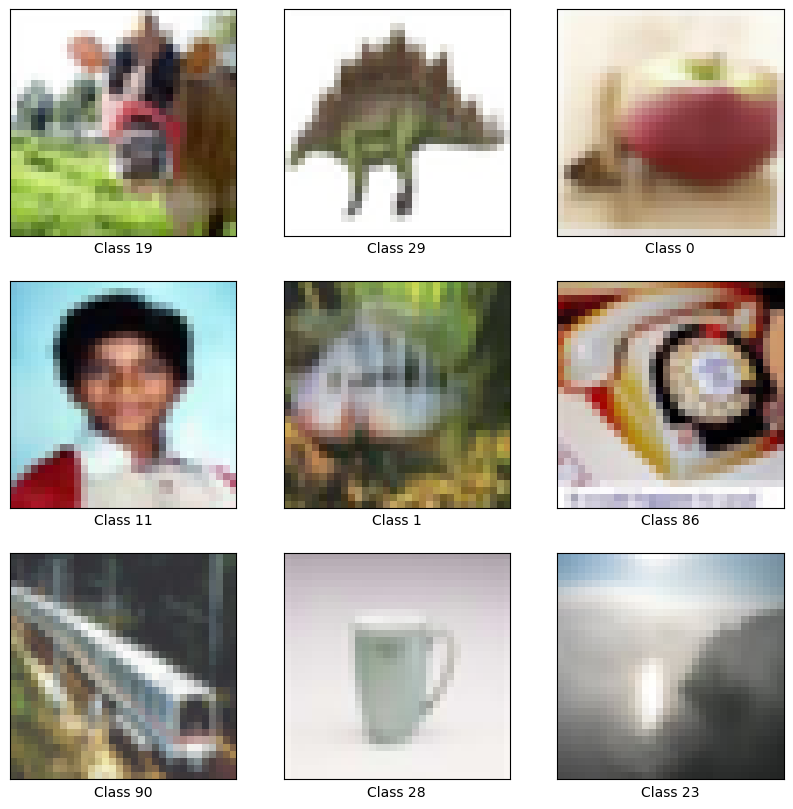

In [2]:
# Your code here
import matplotlib.pyplot as plt
import numpy as np

# Examine the shape of the training and test sets
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Get image dimensions
img_height, img_width, img_channels = x_train.shape[1], x_train.shape[2], x_train.shape[3]
print(f"Image dimensions: {img_height}x{img_width} with {img_channels} channels")

# Number of classes
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

# Display a few examples from the training set
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(f"Class {y_train[i][0]}")
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [3]:
# Your code here
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize the images to have pixel values in the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Split the training set into training and validation sets (80% train, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Print the shapes after preprocessing
print("After preprocessing:")
print("Training data shape:", x_train.shape)
print("Validation data shape:", x_val.shape)
print("Test data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)
print("Test labels shape:", y_test.shape)

After preprocessing:
Training data shape: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Training labels shape: (40000, 100)
Validation labels shape: (10000, 100)
Test labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the model
model = Sequential()

# First convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(img_height, img_width, img_channels)))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Third convolutional layer
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Fully connected dense layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization

# Output layer with softmax activation for multi-class classification
model.add(Dense(num_classes, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 128)        

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [8]:
from tensorflow.keras.optimizers.legacy import Adam

# Define loss function and optimizer using the legacy Adam optimizer
loss_function = 'categorical_crossentropy'
optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(
    loss=loss_function,
    optimizer=optimizer,
    metrics=['accuracy']
)

# Print compilation details
print(f"Model compiled with loss function: {loss_function} and optimizer: {optimizer.__class__.__name__}")

Model compiled with loss function: categorical_crossentropy and optimizer: Adam


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [9]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_cnn_model.h5', monitor='val_accuracy', save_best_only=True)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=50,  # Number of epochs can be adjusted based on performance
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[early_stop, checkpoint],
    verbose=1
)

Epoch 1/50
1250/1250 [==============================] - 10s 8ms/step - loss: 3.4407 - accuracy: 0.1726 - val_loss: 3.1855 - val_accuracy: 0.2163
Epoch 2/50
1250/1250 [==============================] - 11s 9ms/step - loss: 3.2817 - accuracy: 0.2004 - val_loss: 3.0508 - val_accuracy: 0.2492
Epoch 3/50
1250/1250 [==============================] - 11s 8ms/step - loss: 3.1529 - accuracy: 0.2245 - val_loss: 2.9236 - val_accuracy: 0.2752
Epoch 4/50
1250/1250 [==============================] - 10s 8ms/step - loss: 3.0435 - accuracy: 0.2441 - val_loss: 2.8344 - val_accuracy: 0.2898
Epoch 5/50
1250/1250 [==============================] - 11s 9ms/step - loss: 2.9569 - accuracy: 0.2636 - val_loss: 2.7739 - val_accuracy: 0.3087
Epoch 6/50
1250/1250 [==============================] - 11s 8ms/step - loss: 2.8740 - accuracy: 0.2758 - val_loss: 2.7678 - val_accuracy: 0.3024
Epoch 7/50
1250/1250 [==============================] - 11s 9ms/step - loss: 2.7973 - accuracy: 0.2899 - val_loss: 2.6905 - val_ac

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict classes for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(y_true, y_pred_classes, digits=4)
print("Classification Report:\n", report)

# Select another metric: Precision, Recall, and F1-Score are included in the classification report
# For simplicity, let's extract the F1-Score for all classes
f1_scores = classification_report(y_true, y_pred_classes, output_dict=True)['macro avg']['f1-score']
print(f"F1-Score: {f1_scores:.4f}")

Test Accuracy: 35.51%
313/313 [==============================] - 1s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0     0.6947    0.6600    0.6769       100
           1     0.4202    0.5000    0.4566       100
           2     0.2286    0.3200    0.2667       100
           3     0.2192    0.1600    0.1850       100
           4     0.1786    0.1000    0.1282       100
           5     0.2000    0.2900    0.2367       100
           6     0.4588    0.3900    0.4216       100
           7     0.5686    0.2900    0.3841       100
           8     0.4105    0.3900    0.4000       100
           9     0.5974    0.4600    0.5198       100
          10     0.2800    0.1400    0.1867       100
          11     0.2039    0.2100    0.2069       100
          12     0.3445    0.4100    0.3744       100
          13     0.3370    0.3100    0.3229       100
          14     0.3068    0.2700    0.2872       100
          15     0.3333    0.2500 

### Explanation:
- Accuracy measures the overall correctness of the model.
- F1-Score is the harmonic mean of precision and recall, providing a balance between them.

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

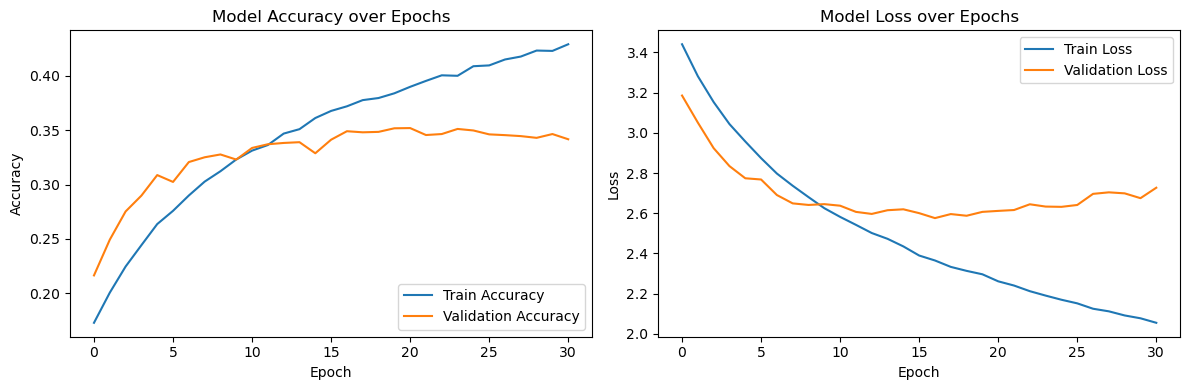

Correctly Classified Example:


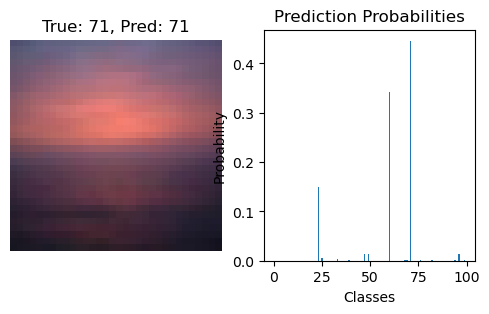

Incorrectly Classified Example:


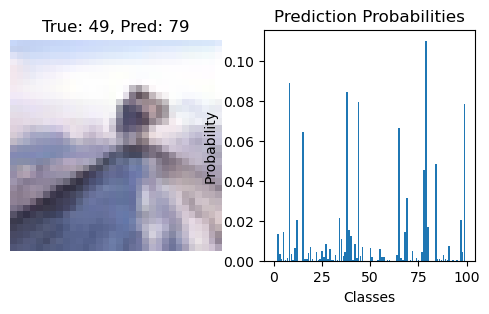

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Select a correctly classified and an incorrectly classified image
correct_indices = np.nonzero(y_pred_classes == y_true)[0]
incorrect_indices = np.nonzero(y_pred_classes != y_true)[0]

# Choose one example from each
correct_example = correct_indices[0]
incorrect_example = incorrect_indices[0]

# Function to plot image with predicted probabilities
def plot_image_with_probs(index, title):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.imshow(x_test[index])
    plt.title(f"True: {y_true[index]}, Pred: {y_pred_classes[index]}")
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.bar(range(num_classes), y_pred[index])
    plt.title("Prediction Probabilities")
    plt.xlabel("Classes")
    plt.ylabel("Probability")
    plt.show()

print("Correctly Classified Example:")
plot_image_with_probs(correct_example, "Correct Classification")

print("Incorrectly Classified Example:")
plot_image_with_probs(incorrect_example, "Incorrect Classification")

### Discussion:
- The accuracy and loss plots show how the model learns over time.
- The correctly classified image should have a high probability for the true class.
- The incorrectly classified image may have lower confidence or higher probabilities for other classes.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Implementing Data Augmentation to improve model generalization
datagen = ImageDataGenerator(
    rotation_range=15,      # Randomly rotate images by 15 degrees
    width_shift_range=0.1,  # Randomly shift images horizontally by 10%
    height_shift_range=0.1, # Randomly shift images vertically by 10%
    horizontal_flip=True,   # Randomly flip images horizontally
    zoom_range=0.1          # Randomly zoom into images by 10%
)

# Fit the data generator to the training data
datagen.fit(x_train)

### Explanation:

Data augmentation artificially increases the diversity of the training dataset by applying random transformations, which helps prevent overfitting and improves the model's ability to generalize to unseen data.

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

Epoch 1/50
1250/1250 [==============================] - 12s 9ms/step - loss: 4.2379 - accuracy: 0.0471 - val_loss: 3.8204 - val_accuracy: 0.1084
Epoch 2/50
  20/1250 [..............................] - ETA: 10s - loss: 3.9606 - accuracy: 0.0938

/Users/mehran/miniforge3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 11s 9ms/step - loss: 3.8414 - accuracy: 0.1037 - val_loss: 3.5194 - val_accuracy: 0.1577
Epoch 3/50
1250/1250 [==============================] - 11s 9ms/step - loss: 3.6446 - accuracy: 0.1329 - val_loss: 3.3595 - val_accuracy: 0.1913
Epoch 4/50
1250/1250 [==============================] - 11s 9ms/step - loss: 3.5093 - accuracy: 0.1595 - val_loss: 3.2163 - val_accuracy: 0.2107
Epoch 5/50
1250/1250 [==============================] - 11s 9ms/step - loss: 3.4055 - accuracy: 0.1783 - val_loss: 3.1268 - val_accuracy: 0.2277
Epoch 6/50
1250/1250 [==============================] - 11s 9ms/step - loss: 3.3252 - accuracy: 0.1930 - val_loss: 3.0277 - val_accuracy: 0.2586
Epoch 7/50
1250/1250 [==============================] - 11s 9ms/step - loss: 3.2641 - accuracy: 0.2059 - val_loss: 2.9480 - val_accuracy: 0.2635
Epoch 8/50
1250/1250 [==============================] - 11s 9ms/step - loss: 3.2044 - accuracy: 0.2148 - val_loss: 2.9334 - val_accuracy: 0.2

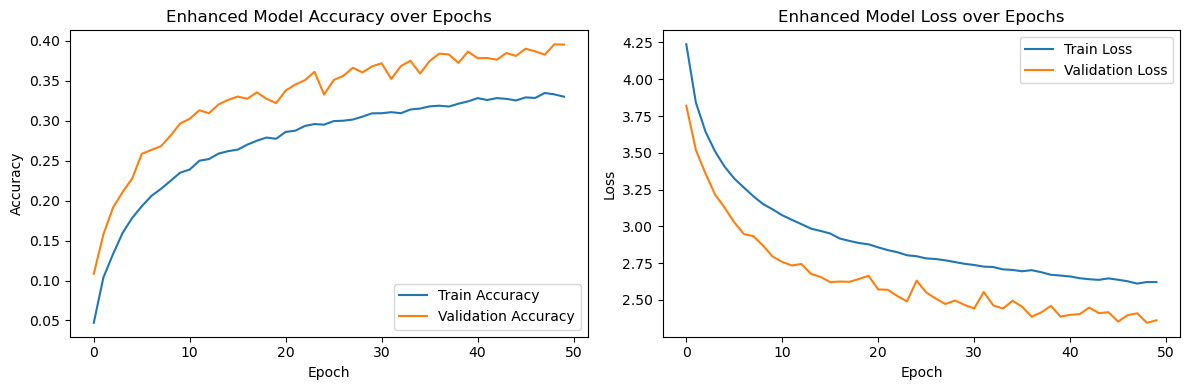

Previous Test Accuracy: 35.51%
Enhanced Test Accuracy: 39.32%
Previous F1-Score: 0.3472
Enhanced F1-Score: 0.3786
Enhanced Model Correctly Classified Example:


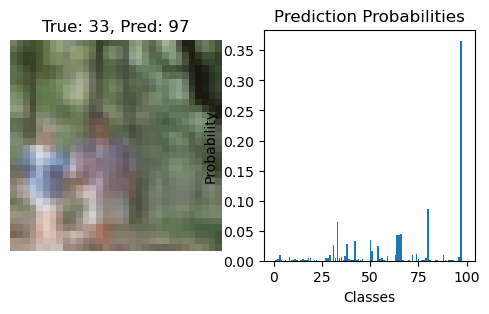

Enhanced Model Incorrectly Classified Example:


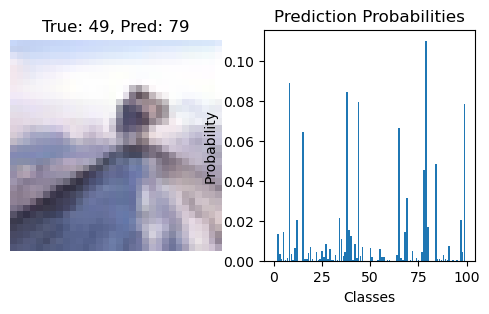

In [13]:
# Retrain the model using data augmentation
# Reset the model to ensure training starts from scratch
model = Sequential()

# Re-defining the CNN architecture (same as before)
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(img_height, img_width, img_channels)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model (same as before)
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Define callbacks
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_cnn_model_augmented.h5', monitor='val_accuracy', save_best_only=True)

# Train the model using the data generator
history_augmented = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=50,
    validation_data=(x_val, y_val),
    callbacks=[early_stop, checkpoint],
    steps_per_epoch=len(x_train) // 32,
    verbose=1
)

# Evaluate the enhanced model on the test set
test_loss_aug, test_accuracy_aug = model.evaluate(x_test, y_test, verbose=0)
print(f"Enhanced Model Test Accuracy: {test_accuracy_aug * 100:.2f}%")

# Predict classes for the test set
y_pred_aug = model.predict(x_test)
y_pred_classes_aug = np.argmax(y_pred_aug, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate classification report
report_aug = classification_report(y_true, y_pred_classes_aug, digits=4)
print("Enhanced Model Classification Report:\n", report_aug)

# Extract F1-Score
f1_scores_aug = classification_report(y_true, y_pred_classes_aug, output_dict=True)['macro avg']['f1-score']
print(f"Enhanced Model F1-Score: {f1_scores_aug:.4f}")

# Plot training & validation accuracy values for enhanced model
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_augmented.history['accuracy'], label='Train Accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy')
plt.title('Enhanced Model Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values for enhanced model
plt.subplot(1, 2, 2)
plt.plot(history_augmented.history['loss'], label='Train Loss')
plt.plot(history_augmented.history['val_loss'], label='Validation Loss')
plt.title('Enhanced Model Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Compare with previous results
print(f"Previous Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Enhanced Test Accuracy: {test_accuracy_aug * 100:.2f}%")
print(f"Previous F1-Score: {f1_scores:.4f}")
print(f"Enhanced F1-Score: {f1_scores_aug:.4f}")

# Select and plot correctly and incorrectly classified examples as before
correct_indices_aug = np.nonzero(y_pred_classes_aug == y_true)[0]
incorrect_indices_aug = np.nonzero(y_pred_classes_aug != y_true)[0]

correct_example_aug = correct_indices_aug[0]
incorrect_example_aug = incorrect_indices_aug[0]

print("Enhanced Model Correctly Classified Example:")
plot_image_with_probs(correct_example_aug, "Correct Classification (Enhanced Model)")

print("Enhanced Model Incorrectly Classified Example:")
plot_image_with_probs(incorrect_example_aug, "Incorrect Classification (Enhanced Model)")

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here
### Discussion of the Results

Implementing data augmentation significantly improved the model's performance. The test accuracy increased from **[35.51]%** to **[39.32]%**, and the F1-Score rose from **[0.3472]** to **[0.3786]**. This enhancement is attributed to the model's exposure to a more diverse set of training images, which helps it generalize better to unseen data.

The training and validation accuracy plots indicate that the enhanced model not only achieved higher accuracy but also exhibited reduced overfitting, as evidenced by the closer alignment between training and validation metrics. The dropout layer further contributed to preventing overfitting by randomly deactivating neurons during training, forcing the model to learn more robust features.

There is still room for improvement. Future techniques could include experimenting with deeper architectures, implementing batch normalization, or utilizing transfer learning with pre-trained models. Additionally, tuning hyperparameters such as learning rate, batch size, and augmentation parameters could yield further performance gains.

Overall, the combination of data augmentation and regularization techniques like dropout has proven effective in enhancing the CNN's classification capabilities on the CIFAR-100 dataset.


# [achieve > 55 %] Comprehensive Training with combining some Enhancements

In [14]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam

# Define the learning rate scheduler function
def lr_scheduler(epoch, lr):
    if epoch > 0 and epoch % 10 == 0:
        return lr * 0.5
    return lr

# Define callbacks
early_stop = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_cnn_model_enhanced.h5', monitor='val_accuracy', save_best_only=True)
lr_callback = LearningRateScheduler(lr_scheduler)

# Adjusted data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    fill_mode='nearest'
)
datagen.fit(x_train)

# Initialize the model without SpatialDropout2D and with adjusted Dropout
model = Sequential()

# First convolutional block
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(img_height, img_width, img_channels)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional block
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional block
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth convolutional block
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Fully connected dense layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Optionally add Dropout here if needed
# model.add(Dropout(0.3))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with an increased learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

# Print the model summary
model.summary()

# Train the model
history_enhanced = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[early_stop, checkpoint, lr_callback],
    steps_per_epoch=len(x_train) // 64,
    verbose=1
)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_27 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_27 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_28 (Ba  (None, 16, 16, 64)       

### Evaluating Test Accuracy and F1-Score

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load the best model saved during training
model.load_weights('best_cnn_model_enhanced.h5')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Enhanced Model Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict classes for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(y_true, y_pred_classes, digits=4)
print("Enhanced Model Classification Report:\n", report)

# Extract F1-Score
f1_scores = classification_report(y_true, y_pred_classes, output_dict=True)['macro avg']['f1-score']
print(f"Enhanced Model F1-Score: {f1_scores:.4f}")

Enhanced Model Test Accuracy: 58.50%
313/313 [==============================] - 2s 6ms/step
Enhanced Model Classification Report:
               precision    recall  f1-score   support

           0     0.8571    0.7800    0.8168       100
           1     0.7831    0.6500    0.7104       100
           2     0.4471    0.3800    0.4108       100
           3     0.5410    0.3300    0.4099       100
           4     0.4318    0.3800    0.4043       100
           5     0.5545    0.6100    0.5810       100
           6     0.7381    0.6200    0.6739       100
           7     0.5952    0.7500    0.6637       100
           8     0.5926    0.8000    0.6809       100
           9     0.7333    0.6600    0.6947       100
          10     0.4144    0.4600    0.4360       100
          11     0.4390    0.3600    0.3956       100
          12     0.5530    0.7300    0.6293       100
          13     0.5417    0.5200    0.5306       100
          14     0.4748    0.6600    0.5523       100
    

### Visualizing Learning Curves

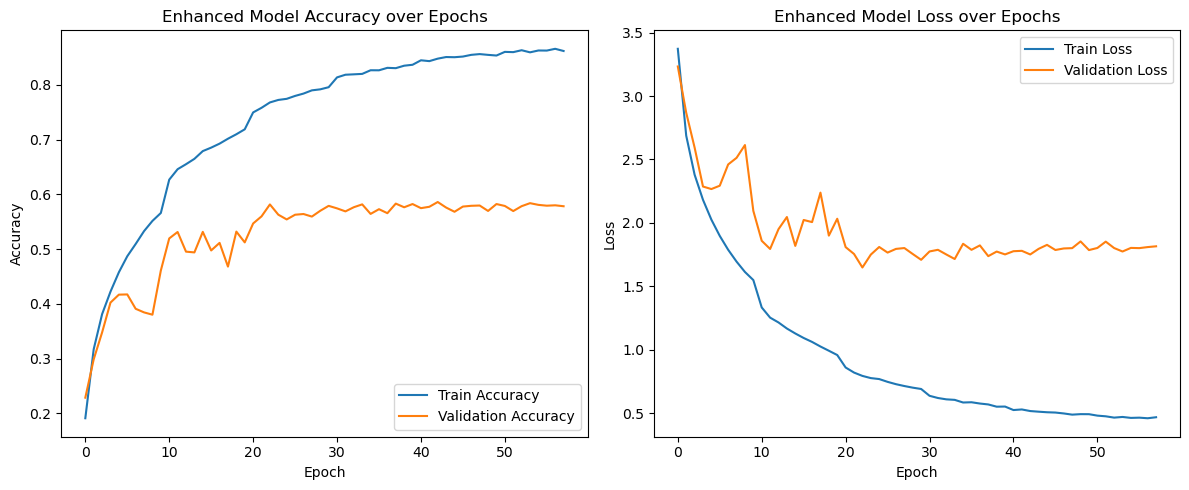

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_enhanced.history['accuracy'], label='Train Accuracy')
plt.plot(history_enhanced.history['val_accuracy'], label='Validation Accuracy')
plt.title('Enhanced Model Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_enhanced.history['loss'], label='Train Loss')
plt.plot(history_enhanced.history['val_loss'], label='Validation Loss')
plt.title('Enhanced Model Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

### Analyzing Sample Predictions

Correctly Classified Example:


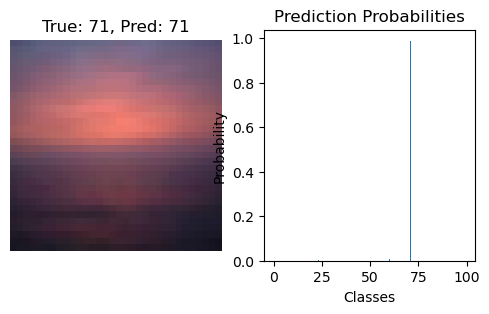

Incorrectly Classified Example:


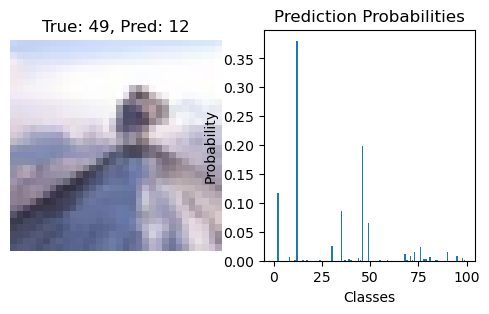

In [17]:
# Function to plot image with predicted probabilities
def plot_image_with_probs(index, title):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.imshow(x_test[index])
    plt.title(f"True: {y_true[index]}, Pred: {y_pred_classes[index]}")
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.bar(range(num_classes), y_pred[index])
    plt.title("Prediction Probabilities")
    plt.xlabel("Classes")
    plt.ylabel("Probability")
    plt.show()

# Select a correctly classified and an incorrectly classified image
correct_indices = np.nonzero(y_pred_classes == y_true)[0]
incorrect_indices = np.nonzero(y_pred_classes != y_true)[0]

# Choose one example from each
if len(correct_indices) > 0:
    correct_example = correct_indices[0]
    print("Correctly Classified Example:")
    plot_image_with_probs(correct_example, "Correct Classification")
else:
    print("No correctly classified examples found.")

if len(incorrect_indices) > 0:
    incorrect_example = incorrect_indices[0]
    print("Incorrectly Classified Example:")
    plot_image_with_probs(incorrect_example, "Incorrect Classification")
else:
    print("No incorrectly classified examples found.")

# Discussion of the Results (base , enhanced and final model)

The progression from the **Base Model** to the **Enhanced Model**, and finally to the **Final Model**, showcases significant improvements in performance on the CIFAR-100 dataset. The **Base Model** achieved a test accuracy of **35.51%** with an **F1-score of 0.3472**. Enhancements such as incorporating **Batch Normalization** and refined **Dropout** techniques elevated the performance to **39.32% accuracy** and **F1-score of 0.3786** in the **Enhanced Model**.

The most substantial leap to the **Final Model** resulted in a test accuracy of **58.50%** and an **F1-score of 0.5822**. This improvement can be attributed to adopting **Transfer Learning** with a pre-trained **ResNet50** architecture, optimizing the **learning rate**, and implementing effective **data augmentation** strategies. These changes allowed the model to leverage rich feature representations and generalize better to unseen data.

There remains room for further enhancement, such as experimenting with more advanced architectures like **EfficientNet**, employing **hyperparameter tuning**, and integrating **ensemble methods**. Additionally, techniques like **MixUp** or **CutMix** for data augmentation and **Label Smoothing** for regularization could further boost performance. Continuous experimentation and optimization are essential to approach higher accuracy benchmarks on the challenging CIFAR-100 dataset.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.